# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

Trees are constructed using a top-down, recursive, greedy approach, splitting data based on feature values that best separate the target variable until a stopping criterion is met.

**Using a real life example**: Imagine sorting a pile of mail.  You first separate it into "bills" and "everything else."  Then you subdivide "bills" into "credit card bills" and "utility bills."  This recursive splitting continues until you have manageable stacks (leaves of the tree).  Each split is based on a feature (type of mail) that best separates the target (bill type). Therefore, a decision tree for mail sorting would similarly start with the root node (all mail) and recursively split based on features such as type of bills (like in this example), or things like sender, size, until it reaches leaf nodes representing specific mail types.


2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees handle non-linear relationships by partitioning the feature space into smaller regions, while linear models assume a linear relationship. Trees can approximate any non-linear function, whereas linear models are limited to linear combinations of the input features.

**Using a real life example**: When predicting house prices, a linear model might assume a simple relationship such as price increases linearly with size.  To the contrary, a tree could capture non-linearity.  For example, a tree might start by splitting house prices based on location (expensive vs. inexpensive areas), then further split based on size within each location. This accounts for the fact that a large house in a wealthy neighborhood is far more expensive than a large house in a less affluent area – and this represents a non-linear relationship. As such linear models would would not capture and accurately model this nuanced interaction.


3. Why is the Gini a good loss function for categorical target variables?

The Gini index measures the impurity of a node and is sensitive to changes in class distribution, making it a good loss function for categorical target variables.

**Using a real life example**: Consider classifying customer reviews as "positive," "negative," or "neutral." The Gini index helps to find the best split at each step of building the tree. For instance, the index might identify word count as a good feature to split the data in which: reviews with fewer than 50 words are more likely to be negative, while longer reviews are a more varied mix. The Gini impurity measures the "mixedness" of each group, driving the tree towards purer nodes where reviews within a node are more likely to share the same sentiment (positive, negative, or neutral).


4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees tend to overfit because they can grow complex enough to perfectly classify the training data. This tendency can be constrained by using techniques such as pruning, setting a maximum depth, requiring a minimum number of samples in each node, and using ensemble methods.

**Using a real life example**: Imagine predicting customer churn/loss for an online bookstore. An overfitted tree might learn that customers who bought the book “Harry Porter” on Friday and logged in at 5 PM from a New York IP address are likely to churn. This is overspecific, overfitting and unlikely to generalize to future customers. To prevent this, we can prune (remove less informative branches), set a maximum tree depth (limit the complexity), or require a minimum number of samples per leaf (prevent branches based on few instances).

- Pruning: Can remove the less informative branches such as New york IP address because that factor is just noise, and does not predict churn for the general customer population in the USA. The pruned branch might simply be: "customers who bought “Harry Porter” on Friday and logged in at 5 PM churn.  

- Set maximum Depth: The tree could grow incredibly deep, creating extremely specific branches based on small subsets of data potentially leading to branches representing only a few customers.  Therefore, setting a maximum depth (e.g., depth = 3), the tree is limited to only three levels of branching. This forces the model to make broader generalizations, preventing the creation of overly complex, overfit branches.  The tree becomes shallower and simpler, improving generalizability.

- Minimum number of samples: It is important to have this set up so that there are at least representative samples of customers (e.g., 10 customers) at the end point of each branch (the leaf node). This ensures that predictions are based on a more substantial and representative group of customers, making the model more robust and less sensitive to individual outliers or unusual data points.  


5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

FALSE. Trees can perform well with both categorical and numerical variables and are not limited to datasets with mostly categorical features.

**Explaining using a real life example**: When predicting car prices, a data scientist can utilize both categorical variables (e.g., make, model, color) and numerical variables (e.g., mileage, age) features effectively. Numerical features can be split based on thresholds (e.g., mileage > 50,000).  Similarly, predicting house prices could use both categorical (location, style) and numerical (size, age) features effectively.


6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Most versions of classification/regression trees use binary splits because it simplifies the splitting process, is efficient and reduces computational complexity. For example, when splitting based on "income level", a binary split of high/low is simpler than a multi-way split of low/medium/high. The extra computational cost of multi-way splits usually doesn't improve accuracy enough to justify the added complexity.

**Using a real life example in medicine to explain dangers of multi-way splits**: Imagine diagnosing an illness.  Splitting symptoms into more than two groups (e.g., fever, cough, headache) at once increases complexity without always increasing accuracy, and consequently leads to wrong medication. Binary splits (yes/no to each symptom) allow the algorithm to efficiently explore possibilities and are easier to interpret.


7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

- Over-fitting: To examine a tree for overfitting, look for deep trees with many nodes and leaves with very few samples. A very deep tree with many leaves, each containing few data points, implies that the tree has "memorized" the training data's noise.

- Underfitting: To examine a tree for underfitting, look for shallow trees with few splits, where the leaves contain a large number of mixed samples.A shallow tree with few splits and large, impure leaves indicates that the tree is not capturing the underlying patterns in the data.

**Using the example about customer churn for an online book store in Q4**: An overfitted tree will be very deep and complex, making specific predictions based on unusual combinations of features seen only in the training data (e.g., predicting purchase only if a customer viewed a specific product at 11:17 AM on a Wednesday). An underfitted tree will be shallow and simple, failing to capture important relationships (e.g., only considering age as a predictor, ignoring other significant factors).


**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [5]:
#1: Loading dataset
df = pd.read_csv('Breast Cancer METABRIC.csv')
df.head(5)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [3]:
#2: One-hot encoding categorical variables with numeric variables
numeric_variables = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
numeric_data = df[numeric_variables]

categorical_variables = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
categorical_data = df[categorical_variables]

categorical_data_encoded = pd.get_dummies(categorical_data, drop_first=True)

df = pd.concat([numeric_data, categorical_data_encoded], axis=1)
df.head(5)

,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage,Chemotherapy_Yes,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,2.0,False,False,True,False,False,False,False,False
1,10.0,0.0,43.19,1.0,False,False,True,False,False,False,False,False
2,15.0,1.0,48.87,2.0,True,False,True,False,False,False,False,False
3,25.0,3.0,47.68,2.0,True,False,False,False,False,True,False,False
4,40.0,8.0,76.97,2.0,True,False,False,False,False,True,False,False


In [6]:
#3: Fit decision tree of Overall Survival Status given the features/covariates X
df = df.dropna(subset=['Overall Survival Status'])

y = df['Overall Survival Status']
X = pd.concat([df[numeric_variables], categorical_data_encoded.loc[df.index]], axis=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.6443231389757724, 0.9827586206896551, 'Age at Diagnosis <= 64.59\ngini = 0.488\nsamples = 1981\nvalue = [1144, 837]'),
 Text(0.4502808385031451, 0.9482758620689655, 'Lymph nodes examined positive <= 4.5\ngini = 0.495\nsamples = 1148\nvalue = [519, 629]'),
 Text(0.5473019887394588, 0.9655172413793103, 'True  '),
 Text(0.32352428155457247, 0.9137931034482759, 'Tumor Size <= 27.5\ngini = 0.485\nsamples = 1008\nvalue = [417, 591]'),
 Text(0.2323806983134029, 0.8793103448275862, 'Age at Diagnosis <= 58.315\ngini = 0.468\nsamples = 756\nvalue = [282, 474]'),
 Text(0.145012139697242, 0.8448275862068966, 'Lymph nodes examined positive <= 1.5\ngini = 0.428\nsamples = 502\nvalue = [156, 346]'),
 Text(0.09482140388470311, 0.8103448275862069, 'Age at Diagnosis <= 52.5\ngini = 0.409\nsamples = 425\nvalue = [122, 303]'),
 Text(0.06494522015621759, 0.7758620689655172, 'Age at Diagnosis <= 49.995\ngini = 0.373\nsamples = 274\nvalue = [68, 206]'),
 Text(0.03450093315822216, 0.7413793103448276, 

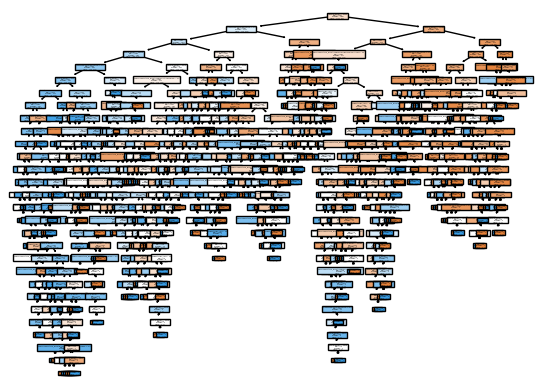

In [7]:
#Dendrogram of decision tree
var_names = clf.feature_names_in_
plot_tree(clf,filled=True,feature_names=var_names)

In [8]:
#Confusion matrix of algorithim's performance
y = df['Overall Survival Status']
X = pd.concat([df[numeric_variables], categorical_data_encoded.loc[df.index]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)

confusion_matrix = pd.crosstab(y_test,y_hat)
acc = np.trace(confusion_matrix) / len(y_test)
print('Accuracy:', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy: 0.6171284634760705 



col_0,Deceased,Living
Overall Survival Status,,
Deceased,153,80
Living,72,92


In [17]:
#Computing true postive rate for sensitivity and true negative rate for specificity using confusion matrix from above
TP = 92
FP = 80
TN = 153
FN = 72

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print('True Positive Rate (Sensitivity):', TPR)
print('True Negative Rate (Specificity):', TNR)

True Positive Rate (Sensitivity): 0.5609756097560976
True Negative Rate (Specificity): 0.6566523605150214


The model tends to perform better with respect to the True Negative Rate (TNR), as TNR = ~ 0.6652 is higher than TPR = 0.5853. This indicates that the model is better at correctly identifying "Deceased"  compared to identifying "Living" individuals.

In [23]:
#5: Predict Overall Survival (Months) given the features/covariates X
df = df.dropna(subset=['Overall Survival (Months)'])

y = df['Overall Survival (Months)']
X = pd.concat([df[numeric_variables], categorical_data_encoded.loc[df.index]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

min_samples_leaf_values = [1, 5, 10, 20, 50, 100]

r2_scores = []

for min_samples_leaf in min_samples_leaf_values:

    dt_regressor = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=42)

    dt_regressor.fit(X_train, y_train)

    y_pred = dt_regressor.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append((min_samples_leaf, r2))

# Find the optimal min_samples_leaf
optimal_min_samples_leaf = max(r2_scores, key=lambda x: x[1])
print(f'Optimal min_samples_leaf: {optimal_min_samples_leaf[1]}')

Optimal min_samples_leaf: 0.1018696506494805


In [24]:
#Computing R^2
optimal_min_samples_leaf = optimal_min_samples_leaf[0]
dt_regressor = DecisionTreeRegressor(min_samples_leaf=optimal_min_samples_leaf, random_state=42)

dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

R^2: 0.1018696506494805


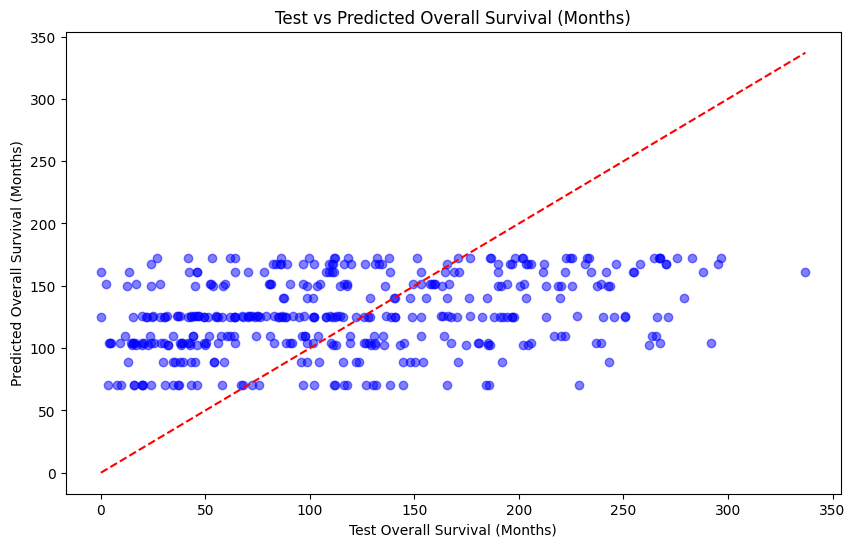

In [26]:
#Plot test values against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test vs Predicted Overall Survival (Months)')
plt.xlabel('Test Overall Survival (Months)')
plt.ylabel('Predicted Overall Survival (Months)')
plt.show()

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

In [30]:
#1: Loading dataset
df = pd.read_csv('corporate_ratings.csv')
df.head(5)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [22]:
#2: Collapsing AAA/AA/A ratings into A, and similarly for B and C
ratings = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C'
}

df['Collapsed_Rating'] = df['Rating'].map(ratings).fillna(df['Rating'])

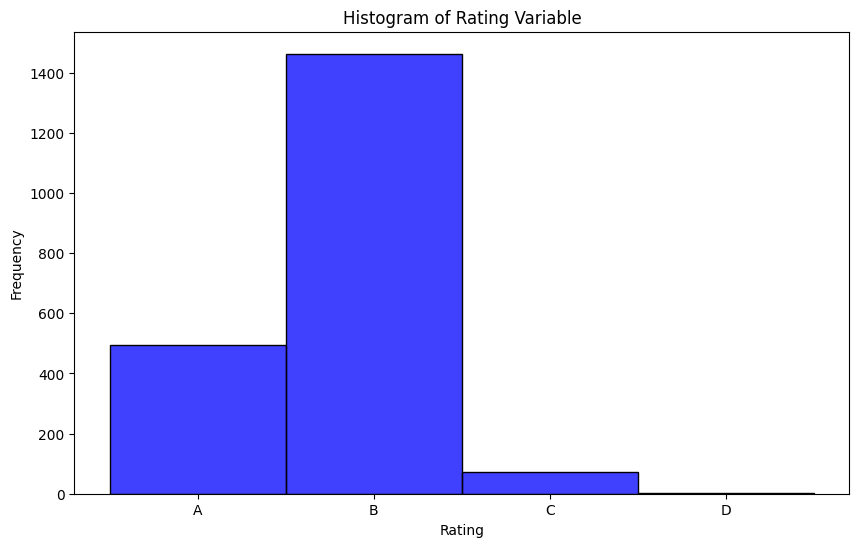

In [4]:
#Histogram of 'Rating' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Collapsed_Rating'], color='blue')
plt.title('Histogram of Rating Variable')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [23]:
#3: Drop variables: Rating, Date, Name, Symbol, and Rating Agency Name
df = df.drop(columns=['Rating', 'Date', 'Name', 'Symbol', 'Rating Agency Name'])
df.head(5)

,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Collapsed_Rating
0,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,A
1,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,B
2,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,B
3,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,B
4,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,B


In [24]:
#Dummy/one-hot Encode of 'Sector'
df_encoded = pd.get_dummies(df, columns=['Sector'], drop_first=True)
df_encoded.head(5)

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


In [25]:
#Collect all relevant columns into data matrix X
X = df_encoded

In [26]:
#4: Apply train/test split to data
y = df['Collapsed_Rating']
X = df_encoded.drop(columns=['Collapsed_Rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Train decision tree classifier to predict bond rating
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [28]:
#Confusion matrix and accuracy of model
y_hat = clf.predict(X_test)

tab = pd.crosstab(y_test, y_hat)
acc = np.trace(tab) / len(y_test)
print('Accuracy:', acc, '\n')
pd.crosstab(y_test, y_hat)

Accuracy: 0.7044334975369458 



col_0,A,B,C
Collapsed_Rating,,,
A,50,45,1
B,47,235,12
C,0,14,1
D,1,0,0


In [31]:
#5: One-Hot Encode the Rating Agency Name Column
df_encoded_with_agency = pd.get_dummies(df, columns=['Rating Agency Name'], drop_first=True)
df_encoded_with_agency.head(5)

,Rating,Name,Symbol,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,...,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,Rating Agency Name_Egan-Jones Ratings Company,Rating Agency Name_Fitch Ratings,Rating Agency Name_Moody's Investors Service,Rating Agency Name_Standard & Poor's Ratings Services
0,A,Whirlpool Corporation,WHR,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,...,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655,True,False,False,False
1,BBB,Whirlpool Corporation,WHR,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,...,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846,True,False,False,False
2,BBB,Whirlpool Corporation,WHR,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,...,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510,False,True,False,False
3,BBB,Whirlpool Corporation,WHR,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,...,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150,False,True,False,False
4,BBB,Whirlpool Corporation,WHR,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,...,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790,False,False,False,True


In [32]:
ratings = {
    'AAA': 'A', 'AA': 'A', 'A': 'A',
    'BBB': 'B', 'BB': 'B', 'B': 'B',
    'CCC': 'C', 'CC': 'C', 'C': 'C'
}

df['Collapsed_Rating'] = df['Rating'].map(ratings).fillna(df['Rating'])

In [33]:
#Apply train-test split
y = df['Collapsed_Rating']
X = df_encoded.drop(columns=['Collapsed_Rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Training decision tree classifier
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [35]:
#Confusion matrix and accuracy of model
y_hat = clf.predict(X_test)

tab = pd.crosstab(y_test, y_hat)
acc = np.trace(tab) / len(y_test)
print('Accuracy:', acc, '\n')
pd.crosstab(y_test, y_hat)

Accuracy: 0.7044334975369458 



col_0,A,B,C
Collapsed_Rating,,,
A,50,45,1
B,47,235,12
C,0,14,1
D,1,0,0


When rating agency is included, the results do not change (they remain the same). This suggests that there are significant levels of noise within the data, which leads to further complexity of analyzing the model.

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?